<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/exercices-solutions/03_Computer_Vision_and_Neural_Network_Exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Computer Vision and Neural Networks Exercices

Take a dataset on kaggle (ex: cat vs dog) and Build a CNN image classifier using the techniques we've built in the course notebook. 

Find an ideal learning rate for a simple convolutional neurol network model on the dataset.

In [1]:
# Importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive

## 1. GET THE DATASET

I have download an image classifier dataset of cats and dogs from kaggle on the following webpage [cat and dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=test_set).

### 1.1 UNZIP the file

In [3]:
# read data from the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("drive/MyDrive/MACHINE_LEARNING/DATASET/cat_vs_dog.zip","r")
zip_ref.extractall()
zip_ref.close()

### 1.2. INSPECT THE DATASET

In [5]:
ls "cat_vs_dog"

test/  train/


We can see the folder of the dataset get a test and a train folder

In [6]:
ls "cat_vs_dog/test/"

cat/  dog/


In [7]:
ls "cat_vs_dog/test/dog/"

 dog.4001.jpg       dog.4251.jpg       dog.4503.jpg       dog.4754.jpg
 dog.4002.jpg       dog.4252.jpg       dog.4504.jpg       dog.4755.jpg
 dog.4003.jpg       dog.4253.jpg       dog.4505.jpg       dog.4756.jpg
 dog.4004.jpg       dog.4254.jpg       dog.4506.jpg       dog.4757.jpg
 dog.4005.jpg       dog.4255.jpg       dog.4507.jpg       dog.4758.jpg
 dog.4006.jpg       dog.4256.jpg       dog.4508.jpg       dog.4759.jpg
 dog.4007.jpg       dog.4257.jpg       dog.4509.jpg       dog.4760.jpg
 dog.4008.jpg       dog.4258.jpg       dog.4510.jpg       dog.4761.jpg
 dog.4009.jpg       dog.4259.jpg       dog.4511.jpg       dog.4762.jpg
 dog.4010.jpg       dog.4260.jpg       dog.4512.jpg       dog.4763.jpg
 dog.4011.jpg       dog.4261.jpg       dog.4513.jpg       dog.4764.jpg
 dog.4012.jpg       dog.4262.jpg       dog.4514.jpg       dog.4765.jpg
 dog.4013.jpg       dog.4263.jpg       dog.4515.jpg       dog.4766.jpg
 dog.4014.jpg       dog.4264.jpg       dog.4516.jpg       dog.4767.jpg
 dog.4

In [8]:
import os

# walk through cat_vs_dog directory and list number of files

for dirpath, dirnames, filenames in os.walk("cat_vs_dog"):
  print(f"{dirpath} has {len(dirnames)} folders and {len(filenames)} files")

cat_vs_dog has 2 folders and 0 files
cat_vs_dog/test has 2 folders and 0 files
cat_vs_dog/test/dog has 0 folders and 1013 files
cat_vs_dog/test/cat has 0 folders and 1012 files
cat_vs_dog/train has 2 folders and 0 files
cat_vs_dog/train/dog has 0 folders and 4006 files
cat_vs_dog/train/cat has 0 folders and 4001 files


In [9]:
# Get the classnames
import pathlib

data_dir = pathlib.Path("cat_vs_dog/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['cat', 'dog']

### 1.3 Visualize the data

In [10]:
import matplotlib.image as mpimg
import random

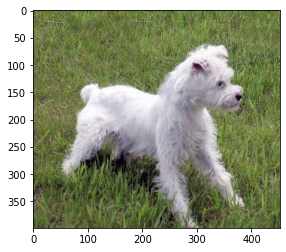

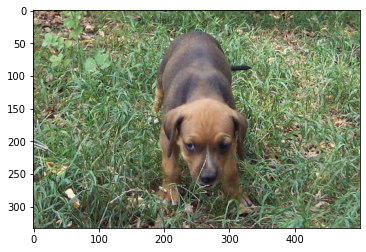

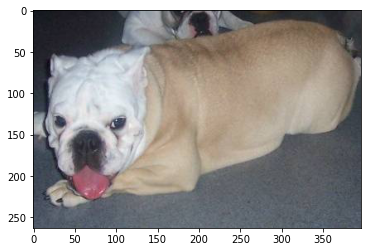

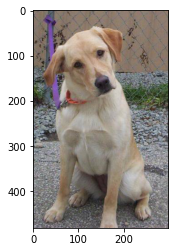

In [11]:
for i in range(4):

  # get randomly an image from the directory cat_vs_dog/train/dog
  random_image = random.sample(os.listdir("cat_vs_dog/train/dog"),1)[0]

  # plot the image in matplotlib
  img = mpimg.imread("cat_vs_dog/train/dog/" + random_image)
  plt.figure()
  plt.imshow(img)
  plt.show()

In [30]:
# creater a function to plot random image from the dataset
def plot_random_image(target_dir, class_name, number_images):

  """
  Plot several images of the selected class from the target dir

  Arguments :
  - target_dir: name of the directory where we want to get the images
  - class_name: name of the class we want to visualize some images
  - number of images: number of images we want to visualize

  Return:
  - imgs : list of the images
  """
  if number_images < 0:
    # message
    error_message = "The argument number_images is not correct {number_images}. Choose a positive number."

    # raise exception
    raise Exception(error_message)

  else:

    list_images = []

    for i in range(number_images):

      # target_folder
      target_folder = f"{target_dir}/{class_name}"

      # random image
      random_image = random.sample(os.listdir(target_folder),1)[0]

      # visualize with matplotlib
      plt.figure()
      img = mpimg.imread(f"{target_folder}/{random_image}")
      plt.imshow(img)
      plt.axis("off")
      plt.title(class_name)
      plt.show()

      # add the image in the returned list
      list_images.append(img)

    return list_images


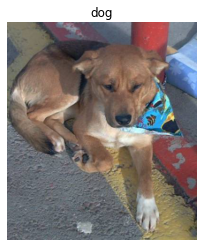

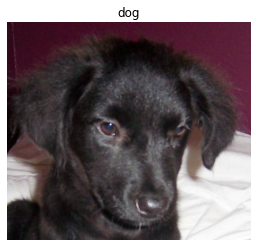

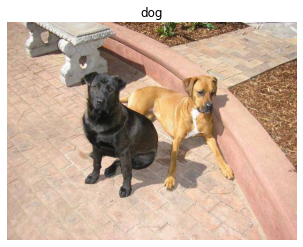

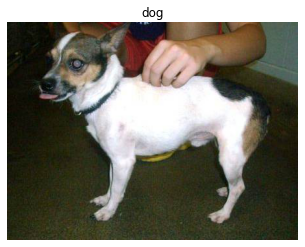

In [36]:
# visualize 4 images of dogs
list_images_dog=plot_random_image("cat_vs_dog/train","dog",4)

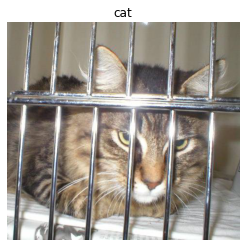

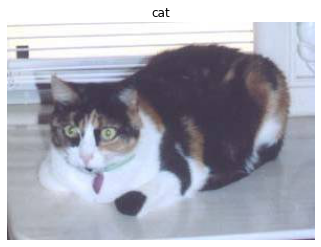

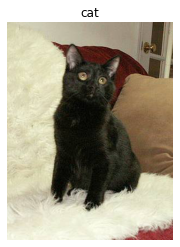

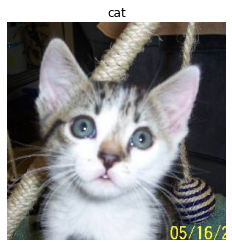

In [37]:
# visualize 4 images of cat
list_images_cat=plot_random_image("cat_vs_dog/train","cat",4)

In [38]:
# Plot the shape of the images
for i,image in enumerate(list_images_dog):
  print(f"Image N°{i}: {image.shape}")

Image N°0: (459, 399, 3)
Image N°1: (447, 500, 3)
Image N°2: (375, 499, 3)
Image N°3: (335, 448, 3)


In [51]:
# Inspect an image
print("Max:", np.max(list_images_cat[0]))
list_images_cat[0]

Max: 255


array([[[144, 138, 126],
        [144, 138, 126],
        [145, 139, 127],
        ...,
        [105, 102,  85],
        [105, 102,  85],
        [105, 102,  85]],

       [[144, 138, 126],
        [144, 138, 126],
        [145, 139, 127],
        ...,
        [105, 102,  85],
        [105, 102,  85],
        [105, 102,  85]],

       [[144, 138, 126],
        [145, 139, 127],
        [145, 139, 127],
        ...,
        [105, 102,  85],
        [105, 102,  85],
        [105, 102,  85]],

       ...,

       [[205, 210, 206],
        [210, 215, 211],
        [213, 217, 216],
        ...,
        [186, 190, 189],
        [184, 188, 187],
        [183, 187, 186]],

       [[220, 225, 221],
        [221, 226, 222],
        [218, 222, 221],
        ...,
        [197, 202, 198],
        [196, 201, 197],
        [195, 200, 196]],

       [[209, 214, 210],
        [215, 220, 216],
        [218, 222, 221],
        ...,
        [206, 211, 207],
        [205, 210, 206],
        [205, 210, 206]]

# 2. Build a CNN classifier

In [54]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [55]:
# set seed
tf.random.set_seed(42)

# image data generator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data directories
train_dir = "cat_vs_dog/train/"
test_dir = "cat_vs_dog/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Create a model
model_1 = tf.keras.Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [60]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 49s 145ms/step - loss: 0.6814 - accuracy: 0.5590 - val_loss: 0.6382 - val_accuracy: 0.6110
Epoch 2/5
251/251 [==============================] - 34s 136ms/step - loss: 0.5827 - accuracy: 0.6929 - val_loss: 0.6074 - val_accuracy: 0.6708
Epoch 3/5
251/251 [==============================] - 34s 135ms/step - loss: 0.4828 - accuracy: 0.7678 - val_loss: 0.5891 - val_accuracy: 0.7029
Epoch 4/5
251/251 [==============================] - 35s 139ms/step - loss: 0.4122 - accuracy: 0.8104 - val_loss: 0.6416 - val_accuracy: 0.7039
Epoch 5/5
251/251 [==============================] - 43s 170ms/step - loss: 0.3306 - accuracy: 0.8537 - val_loss: 0.6953 - val_accuracy: 0.6861


In [77]:
# dataframe of the result
df_curves = pd.DataFrame(history_1.history)
df_curves

,loss,accuracy,val_loss,val_accuracy
0,0.681356,0.559026,0.638175,0.610974
1,0.582736,0.692942,0.607378,0.670786
2,0.482820,0.767770,0.589134,0.702916
3,0.412171,0.810369,0.641608,0.703905
4,0.330616,0.853716,0.695292,0.686110


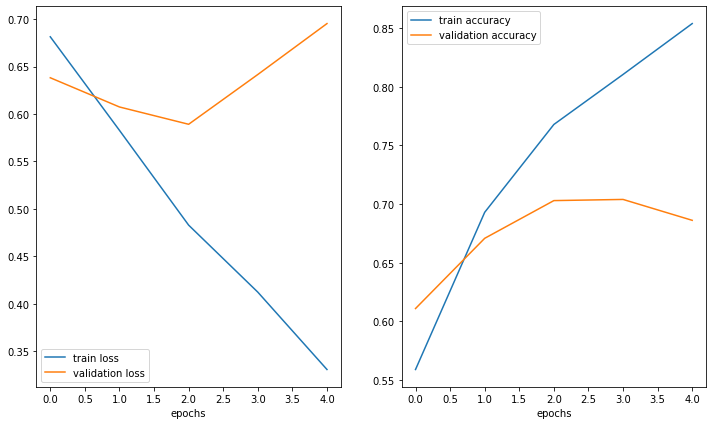

In [85]:
from matplotlib import axes
# plot loss curves
fig, axs = plt.subplots(1,2,figsize=(12,7))

# loss curves
train_loss = history_1.history["loss"]
val_loss =  history_1.history["val_loss"]

# accuracy
train_acc =  history_1.history["accuracy"]
val_acc =  history_1.history["val_accuracy"]

# plot
axs[0].plot(train_loss, label="train loss")
axs[0].plot(val_loss, label="validation loss")
axs[1].plot(train_acc, label="train accuracy")
axs[1].plot(val_acc, label="validation accuracy")

# set axis
axs[0].set_xlabel("epochs")
axs[1].set_xlabel("epochs")

# set legend
axs[0].legend()
axs[1].legend()

plt.show()